# Collab Setup 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/"

 Assignment6_Report.gdoc
'College Transript and Certificate (1).pdf'
 ConsultingPrep_20220526
'Estimated Expenses 2021 (1 year).pdf'
 OperationsResearch_Syllabus.pdf
'PowderPlan_Rev1 (1).dwg'
 Quiz2_TSingh.gdoc
 Report.gdoc
 Report_Trishita_Singh.docx
 Report_Trishita_Singh_v3.docx
 Report_Trishita_Singh_v4.docx
 Report_Trishita_Singh_v_Final.docx
 test
 TrishitaSingh_InternshipReview_20220816_v2.pptx
'Untitled spreadsheet.gsheet'


In [ ]:
cd /content/gdrive/My Drive/test

/content/gdrive/My Drive/test


# Imports



In [ ]:
# One way of importing 
import pandas as pd
# Another way of importing 
# Has the same result 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import numpy as np


# Exploratory Data Analysis 


In [ ]:
# Importing dataset
CasinoDf = pd.read_csv("Casino_RawData.csv");

In [ ]:
# Looking at the dataframe columns
CasinoDf.head()

,Player,Slots,BJ,Craps,Bac,Bingo,Poker,Other,Total Spend,Gender,Age
0,Player 1,1013.0,6190.0,4276.0,868.0,0.0,0.0,0.0,12348.0,Female,58.0
1,Player 2,68.0,23.0,23.0,12.0,0.0,28.0,53.0,207.0,Male,55.0
2,Player 3,148.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,Female,34.0
3,Player 4,63.0,17.0,28.0,9.0,0.0,23.0,52.0,193.0,Male,21.0
4,Player 5,92.0,44.0,18.0,10.0,0.0,26.0,60.0,250.0,Female,68.0


# Data Cleaning

In [ ]:
# Checking data type of columns
CasinoDf.dtypes

Player          object
Slots          float64
BJ             float64
Craps          float64
Bac            float64
Bingo          float64
Poker          float64
Other          float64
Total Spend    float64
Gender          object
Age            float64
dtype: object

In [ ]:
# Converting data type of Gender to string
CasinoDf['Gender']=CasinoDf['Gender'].astype('str')

In [ ]:
# Looking for Null values in all the columns 
CasinoDf.isnull().sum()

Player         27
Slots          27
BJ             27
Craps          27
Bac            27
Bingo          27
Poker          27
Other          27
Total Spend    27
Gender          0
Age            27
dtype: int64

In [ ]:
# Checking for duplicate rows
CasinoDf[CasinoDf.duplicated()].shape
## There are 26 duplicated rows, hence we will need to remove these rows for a more accurate analysis

(26, 11)

In [ ]:
# Based on the exploration of missing values, we can conclude that there is absolutely no information
# for 27 players apart from their Gender
CasinoDf.isnull()

,Player,Slots,BJ,Craps,Bac,Bingo,Poker,Other,Total Spend,Gender,Age
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5022,True,True,True,True,True,True,True,True,True,False,True
5023,True,True,True,True,True,True,True,True,True,False,True
5024,True,True,True,True,True,True,True,True,True,False,True
5025,True,True,True,True,True,True,True,True,True,False,True


In [ ]:
# Since there is no scope to impute or extrapolate values, we shall drop all the rows with missing values
df = CasinoDf.dropna()

In [ ]:
# Checking total number of rows
df.shape

(5000, 11)

In [ ]:
# Checking for duplicate rows
df[df.duplicated()].shape
## There are no duplicate rows after dropping the null values

(0, 11)

In [ ]:
# Overview of distribution of values for respective columns
df.describe()


,Slots,BJ,Craps,Bac,Bingo,Poker,Other,Total Spend,Age
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,291.774200,283.290600,267.627200,82.06860,10.086400,54.592200,132.973800,1122.417600,45.436800
std,326.863428,899.171732,933.883391,247.13544,31.942019,105.856944,217.511286,2226.217881,14.455566
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,13.000000,21.000000
25%,62.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,185.000000,33.000000
50%,104.000000,24.000000,16.000000,7.00000,0.000000,11.000000,34.500000,336.500000,45.000000
75%,507.000000,190.000000,117.500000,35.00000,0.000000,27.000000,74.000000,757.000000,58.000000
max,1861.000000,7294.000000,7251.000000,2254.00000,213.000000,914.000000,1025.000000,15582.000000,89.000000


Owing to the difference between 75% and max values for the spend on each game, let's analyze the outliers in the next step





In [ ]:
df.shape

(5000, 11)

In [ ]:
## Removing outliers: The outliers for 'Bingo' have not been removed since all the rows get omitted. Aditionally, 'Total Spend' is removed since
#  it depends on the sum of the other columns and we don't want to remove any outliers from 'Age'
columns = ['Slots',	'BJ',	'Craps', 'Bac','Poker',	'Other']
for every_column in columns: 
  q1 = df[every_column].quantile(0.25)
  q3 = df[every_column].quantile(0.75)
  iqr = q3-q1
  filter = (df[every_column] >= q1 -  1.5*iqr) & (df[every_column] <= q3 + 1.5*iqr)
  df = df.loc[filter] 

In [ ]:
df.shape

(3195, 11)

In [ ]:
# For 'Bingo' we take a different approach by looking at the z score which is a much better metric based on the data for this column 
z_score = (df['Bingo'] - df['Bingo'].mean())/df['Bingo'].std()
threshold = 3
# Removing the values outside of the threshold limit set for the z score 
df = df[z_score < threshold]

In [ ]:
df.shape

(3121, 11)

#Data Visualization



Questions to target based on data:
1. Which gender spends more?
2. Which gender plays more?
3. Which age bucket plays more?
4. Which age bucket spends more?
5. Which games are primarily played?
6. Which games provide the most revenue?
7. Which games are positively correlated to each other?

## 1. Total Spend based on gender

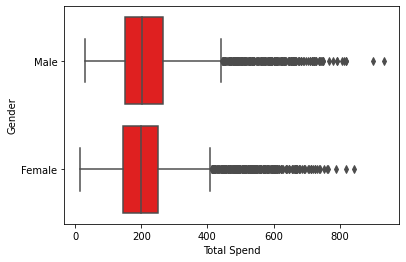

In [ ]:
# Total Spend based on gender
import seaborn as sns
sns.boxplot(x = "Total Spend", y =  "Gender", data = df, color = 'r')


Conclusion 1: The total spend for women looks marginally higher than men, with a higher case of outliers as well. However, overall its not siginificant. The outliers of abnormal maximum spends in the games seems to be primarily from women however, contributing to the average revenue of games like BJ and Other

##2. Total player count based on gender

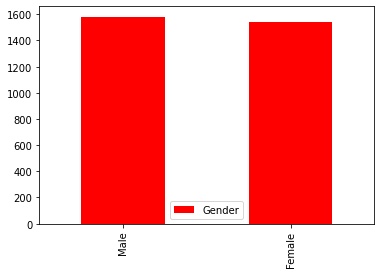

In [ ]:
# Count how many men and women players are there
gender_counts = df["Gender"].value_counts().to_frame().plot(kind='bar', color = 'r')
gender_counts


Conclusion 2: Considering the subtle difference between the numbers of players and spend distribution, there is not any data to prioritize a specific gender

##3. Player count based on age

In [ ]:
# Analysis of player count based on age
# Creating a new column with age buckets
# List of our conditions
conditions = [
    (df['Age'] <= 30),
    (df['Age'] > 30) & (df['Age'] <= 40),
    (df['Age'] > 40) & (df['Age'] <= 50),
    (df['Age'] > 50) & (df['Age'] <= 60),
    (df['Age'] > 60) & (df['Age'] <= 70),
    (df['Age'] > 70)
    ]

# List of the values we want to assign for each condition
values = ['21-30', '31-40', '41-50', '51-60', '61-70', '>70']

# Using np.select to assign values to it using our lists as arguments
df['Age_buckets'] = np.select(conditions, values)

# Display updated DataFrame
df.head()

,Player,Slots,BJ,Craps,Bac,Bingo,Poker,Other,Total Spend,Gender,Age,Age_buckets
1,Player 2,68.0,23.0,23.0,12.0,0.0,28.0,53.0,207.0,Male,55.0,51-60
2,Player 3,148.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,Female,34.0,31-40
3,Player 4,63.0,17.0,28.0,9.0,0.0,23.0,52.0,193.0,Male,21.0,21-30
4,Player 5,92.0,44.0,18.0,10.0,0.0,26.0,60.0,250.0,Female,68.0,61-70
5,Player 6,658.0,0.0,0.0,0.0,106.0,0.0,0.0,764.0,Female,59.0,51-60


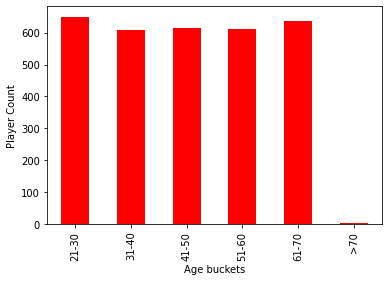

In [ ]:
age_values=df.groupby(['Age_buckets'])['Player'].count().plot(kind='bar', color = "r")
plt.xlabel('Age buckets')
plt.ylabel('Player Count')
plt.show()


 Conclusion 3: The number of players are staying consistent across all age buckets. Hence, prioritizing a age bucket based on number of players won't be ideal. However, we can see the spend distribution based on the age buckets for the same range of count of players

##4. Spend analysis based on age

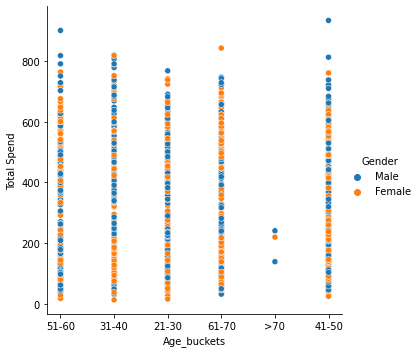

In [ ]:
# Spend distribution based on age
# Creating a copy of the df 
copy_df = df[['Age_buckets', 'Total Spend', 'Gender']].copy()
# Rearranging the age buckets in increasing order 
age_order = ['21-30', '31-40', '41-50', '51-60', '61-70', '>70']
# Visualizing a dataframe for spend analysis based on age
sns.relplot(x= 'Age_buckets', y= 'Total Spend', data=copy_df, color = 'r', hue= "Gender", row_order=age_order) 


Conclusion 4: Age buckets from 41-70 have a higher spend than the lower age buckets 

## Frequently played games

In [ ]:
# Games most played
df.describe()
## Based on the previous table, we see that the average spend on three games are the highest - slots, BJ and Other
## However, looking at the difference between max and 75% values, its a good idea to look at the distributions as well

,Slots,BJ,Craps,Bac,Bingo,Poker,Other,Total Spend,Age
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000
mean,166.875681,17.269465,10.061839,4.948414,12.570650,9.917975,25.228132,246.872797,45.507209
std,170.548489,29.416376,10.936429,5.384828,33.035726,10.794244,27.368424,160.215184,14.550774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,21.000000
25%,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.000000,33.000000
50%,89.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3.000000,201.000000,46.000000
75%,150.000000,30.000000,20.000000,10.000000,0.000000,20.000000,50.000000,257.000000,58.000000
max,843.000000,357.000000,37.000000,22.000000,132.000000,44.000000,109.000000,934.000000,89.000000


#### Distribution plot of games with the three highest average spends

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

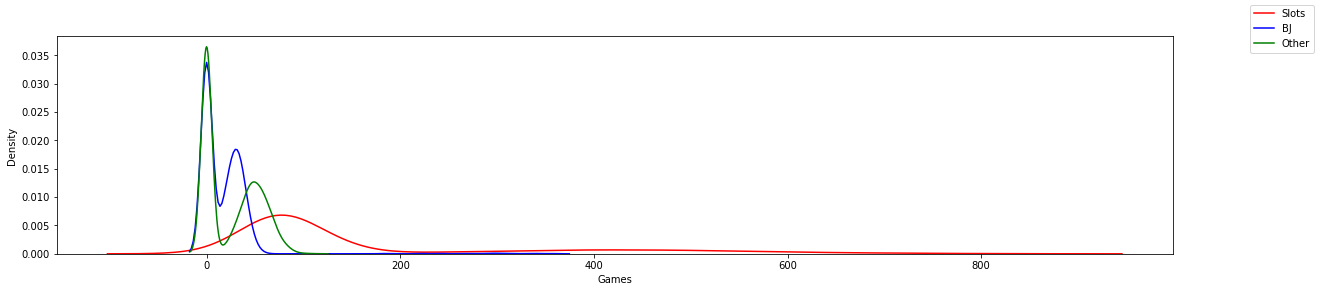

In [ ]:
fig = plt.figure(figsize=(20,4))
sns.distplot(df['Slots'], color = "r", bins = 10, hist = False)
sns.distplot(df['BJ'], color = "blue", bins = 10, hist = False)
g = sns.distplot(df['Other'], color = "green", bins = 10, hist = False)
fig.legend(labels=['Slots','BJ', 'Other'])
g.set_xlabel("Games")
plt.show()


Conclusion 5: Slots has a wider and more uniform spread making it the most consistent -frequency based game with a gap of significant revenue than other games

#### Analysis of games with bimodal distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

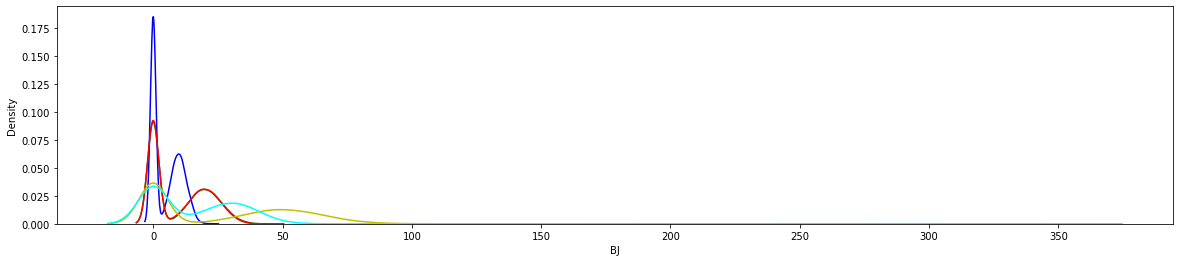

In [ ]:
## Analyzing plot for the games that show bimodal distribution
fig = plt.figure(figsize=(20,4))
sns.distplot(df['Craps'], color = "green", bins = 10, hist = False)
sns.distplot(df['Bac'], color = "blue", bins = 10, hist = False)
sns.distplot(df['Poker'], color = "r", bins = 10, hist = False)
sns.distplot(df['Other'], color = "y", bins = 10, hist = False)
sns.distplot(df['BJ'], color = "cyan", bins = 10, hist = False)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


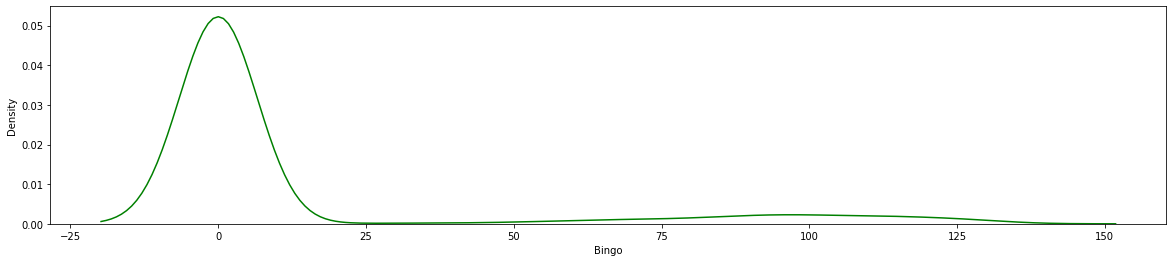

In [ ]:
fig = plt.figure(figsize=(20,4))
sns.distplot(df['Bingo'], color = "green", bins = 10, hist = False)

 Further Analysis needed to dissecting the presence of two nodes. Bingo shows a unimodal distribution.

### Games positively correlated with each other and towards the spend

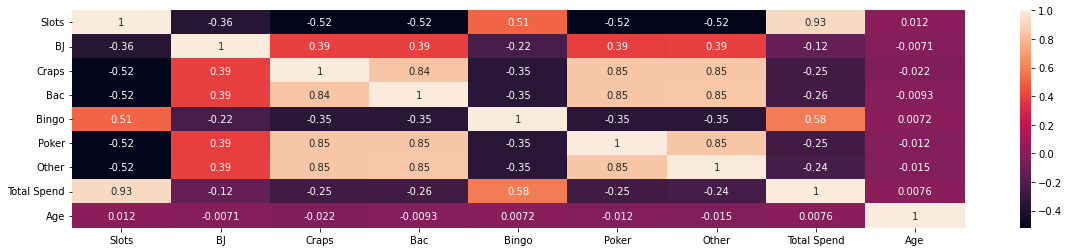

In [ ]:
# Understanding consumer behaviour across the several games
fig = plt.figure(figsize=(20,4))
df_new = df.iloc[:,1:11]
c = df_new.corr()
sns.heatmap(c, xticklabels = c.columns, yticklabels = c.columns, annot=True)

Conclusion 6: Slots and Bingo have the highest contribution to the total spend. Craps, Bac, Poker and Other games has a negative impact on the spend

#Recommendation based Insights

###1. Games played by each gender

In [ ]:
df

,Player,Slots,BJ,Craps,Bac,Bingo,Poker,Other,Total Spend,Gender,Age,Age_buckets
1,Player 2,68.0,23.0,23.0,12.0,0.0,28.0,53.0,207.0,Male,55.0,51-60
2,Player 3,148.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,Female,34.0,31-40
3,Player 4,63.0,17.0,28.0,9.0,0.0,23.0,52.0,193.0,Male,21.0,21-30
4,Player 5,92.0,44.0,18.0,10.0,0.0,26.0,60.0,250.0,Female,68.0,61-70
5,Player 6,658.0,0.0,0.0,0.0,106.0,0.0,0.0,764.0,Female,59.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Player 4996,104.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,Male,45.0,41-50
4996,Player 4997,480.0,0.0,0.0,0.0,50.0,0.0,0.0,530.0,Male,33.0,31-40
4997,Player 4998,491.0,0.0,0.0,0.0,0.0,0.0,0.0,491.0,Female,50.0,41-50
4998,Player 4999,73.0,36.0,19.0,16.0,0.0,13.0,49.0,207.0,Female,40.0,31-40


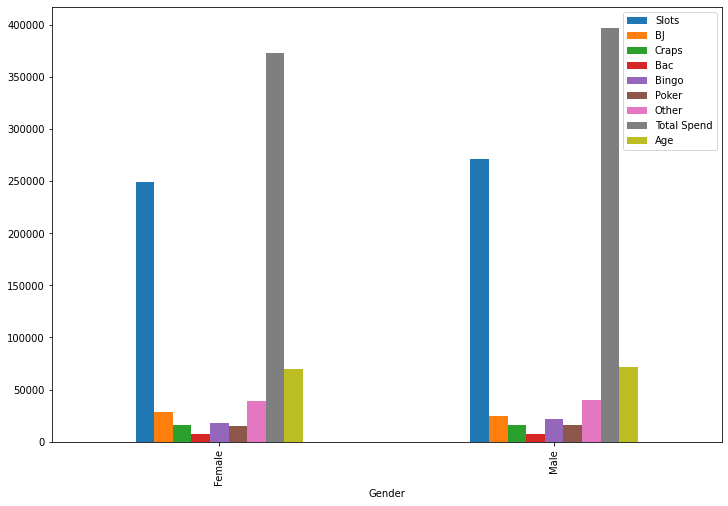

In [ ]:
df.groupby(['Gender']).sum().plot(kind='bar', figsize=(12,8))

#####Conclusion: Men and women play games in a similar propotion with a higher focus on 'Slots' and 'Other'

###2. Games played by the age groups

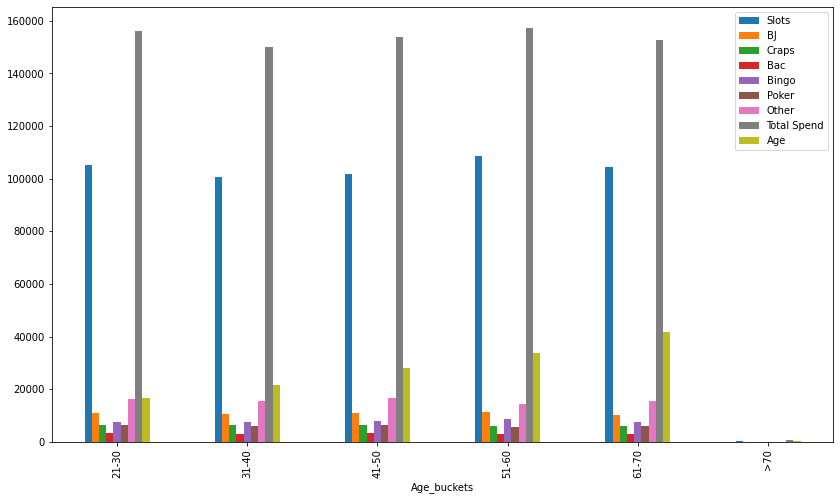

In [ ]:
df.groupby(['Age_buckets']).sum().plot(kind='bar', figsize=(14,8))


#####Conclusion: All age groups play the games in a similar pattern as well with a higher focus on 'Slots' and 'Others'

##**Takeaways:**
1. 'Slots' is the most frequently played game with the highest value for spend per player with a siginificantly higher average revenue
2. 'BJ' and 'Others' have high revenue too, however that is also primarily due to more female outliers spending significantly high amounts
3. Gender and age has no significant pattern with spend, however most of the maximum spend values have come from women
4. 41-70 age group has a marginally higher mean than the other age groups, which can be crucial for marketing
5. Though Bingo has a much lesser average revenue, we see that the players playing Slots are very likely to play Bingo, or, players playing both these games are likely to spend on other games 

##Next Steps:**

1. Understand more data regarding patterns of play and time analysis to see any patterns with gender and age
2. Focus on marketing to older age groups between 41-70 with their top 2 games as- 'Slots', 'Others' on the spend basis
3. Review the bimodal patterns of BJ,Craps, Poker, Bac and Other games to understand what factors are leading to two modes in the distribution - could be a distinction in the customer segments or a mix of age and gender factors affecting together





